# Predicting Diabetes Using Machine Learning Models

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Getting statistical information
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Filter out rows with 'No Info' in smoking_history
data = df[df['smoking_history'] != 'No Info'].copy()

# Drop missing values if any
data = data.dropna()

data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [ ]:
# Encode categorical variables
data = df[df['smoking_history'] != 'No Info'].copy()
data = data.dropna()
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,3,27.32,6.6,85,0


## **Univariate Analysis**

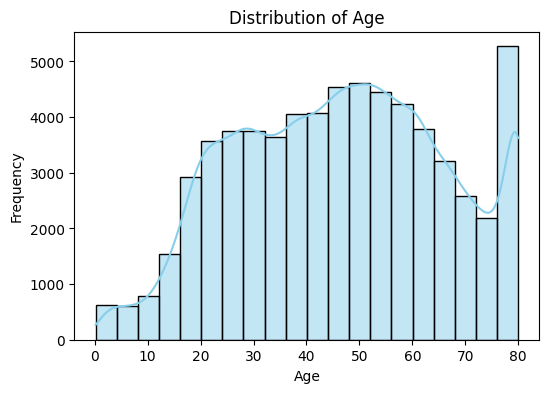

In [ ]:
# Histogram of Distribution of Age
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0.98, 'Histograms of Numerical Features')

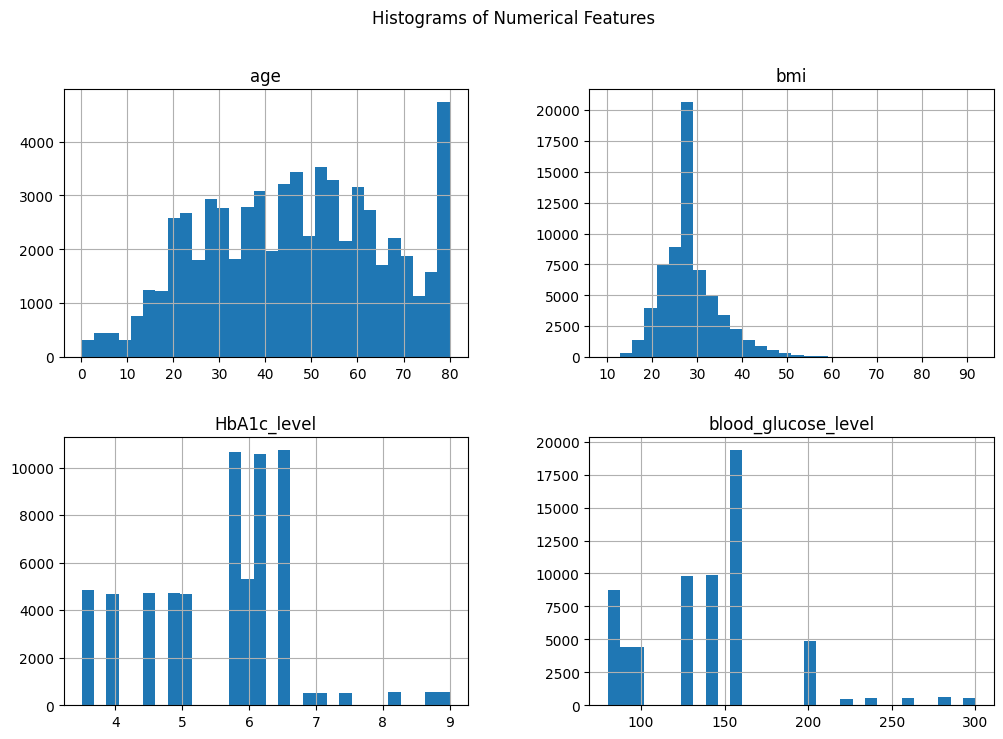

In [ ]:
# Histogram of Numerical fetaures
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')

<ipython-input-11-d037f10a7652>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='age', data=data, palette='coolwarm')


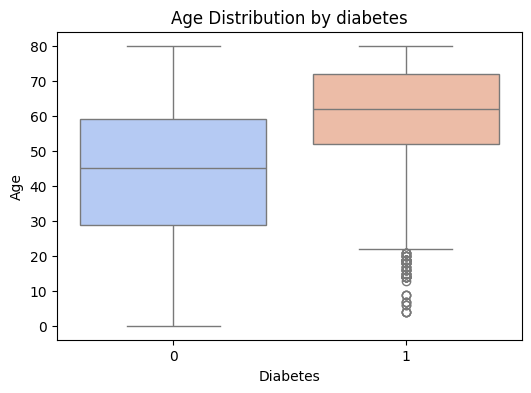

In [ ]:
# Age distribution with diabetes box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='diabetes', y='age', data=data, palette='coolwarm')
plt.title('Age Distribution by diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

# **Bivariate Analysis**

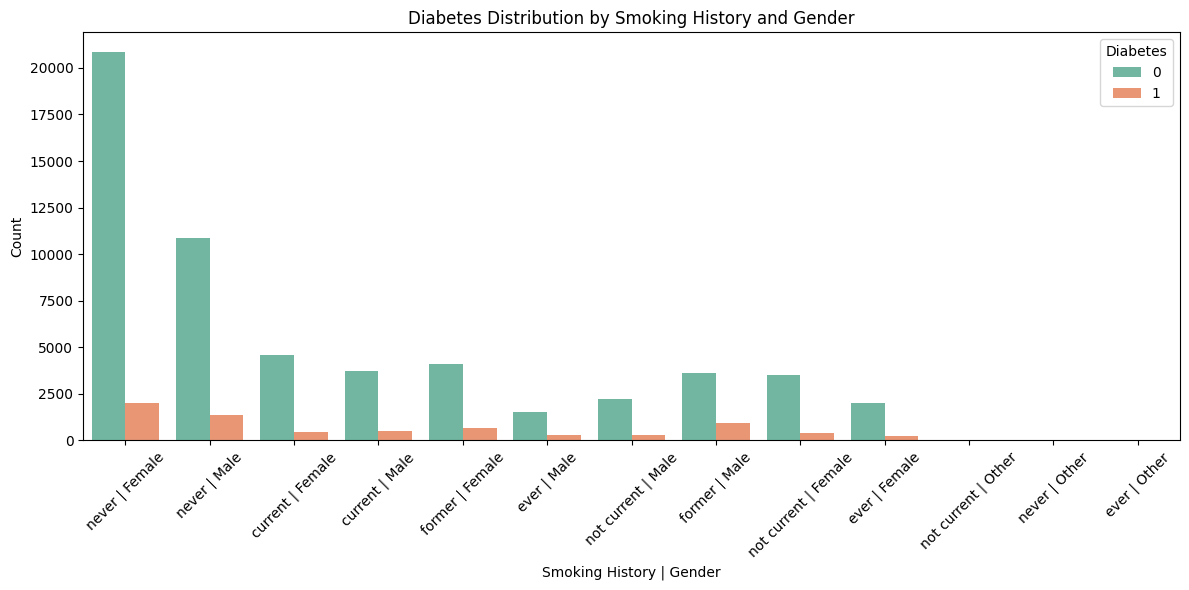

In [ ]:
# Use the original df instead of label-encoded data for plotting
plot_data = df[df['smoking_history'] != 'No Info'].dropna().copy()

# Create a combined category column
plot_data['smoke_gender'] = plot_data['smoking_history'] + ' | ' + plot_data['gender']

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=plot_data, x='smoke_gender', hue='diabetes', palette='Set2')
plt.title('Diabetes Distribution by Smoking History and Gender')
plt.xlabel('Smoking History | Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes')
plt.tight_layout()
plt.show()

<Figure size 1400x1200 with 0 Axes>

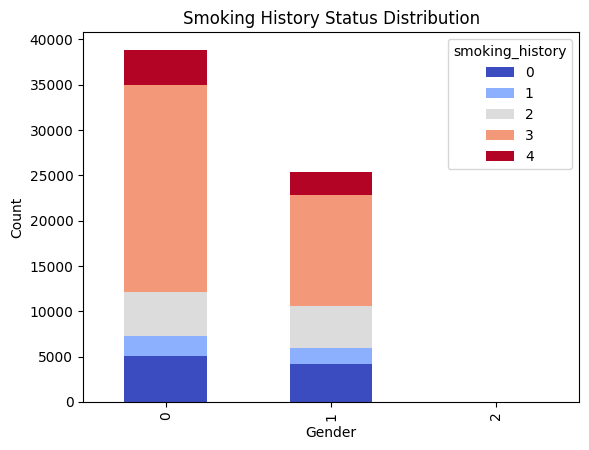

In [ ]:
# Bar plot of smoking history distribution with gender
plt.figure(figsize=(14,12))
pd.crosstab(data['gender'], data['smoking_history']).plot(kind='bar', stacked=True ,cmap='coolwarm')
plt.title('Smoking History Status Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

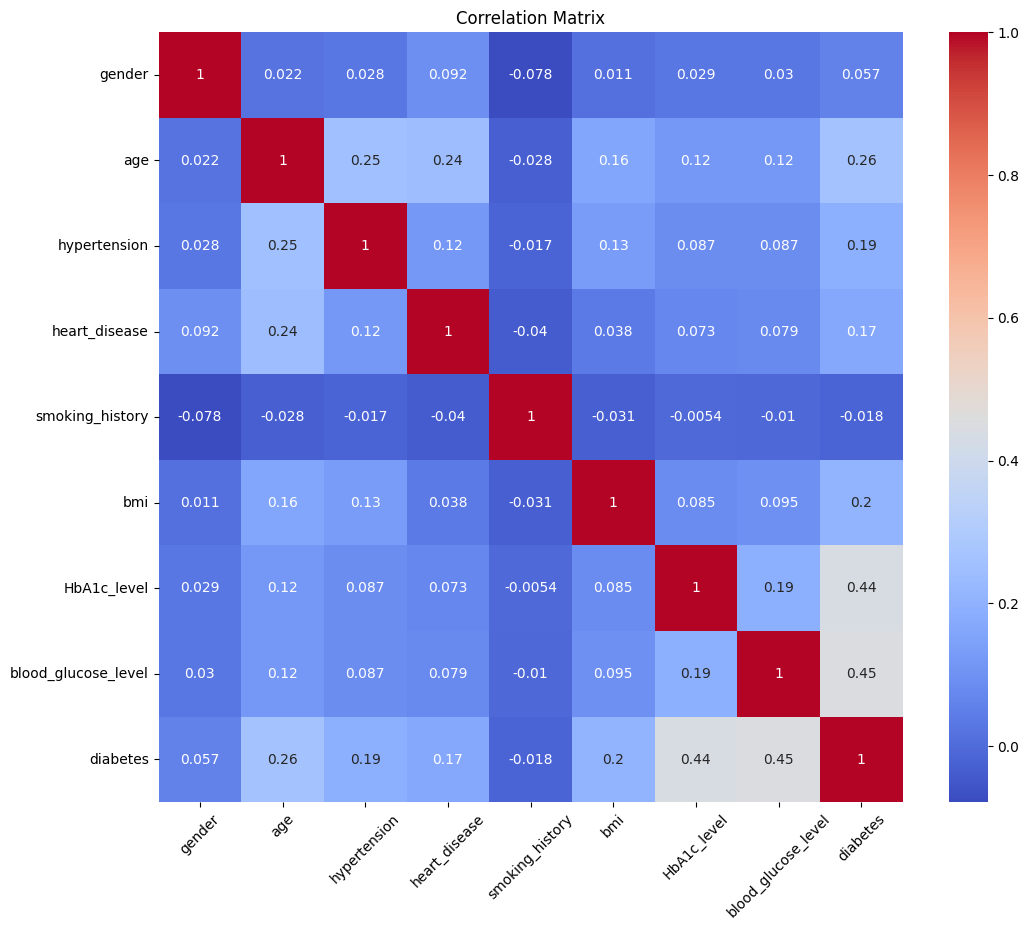

In [ ]:
# Correlation of all numerical variables
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

# **Multivariate Analysis**

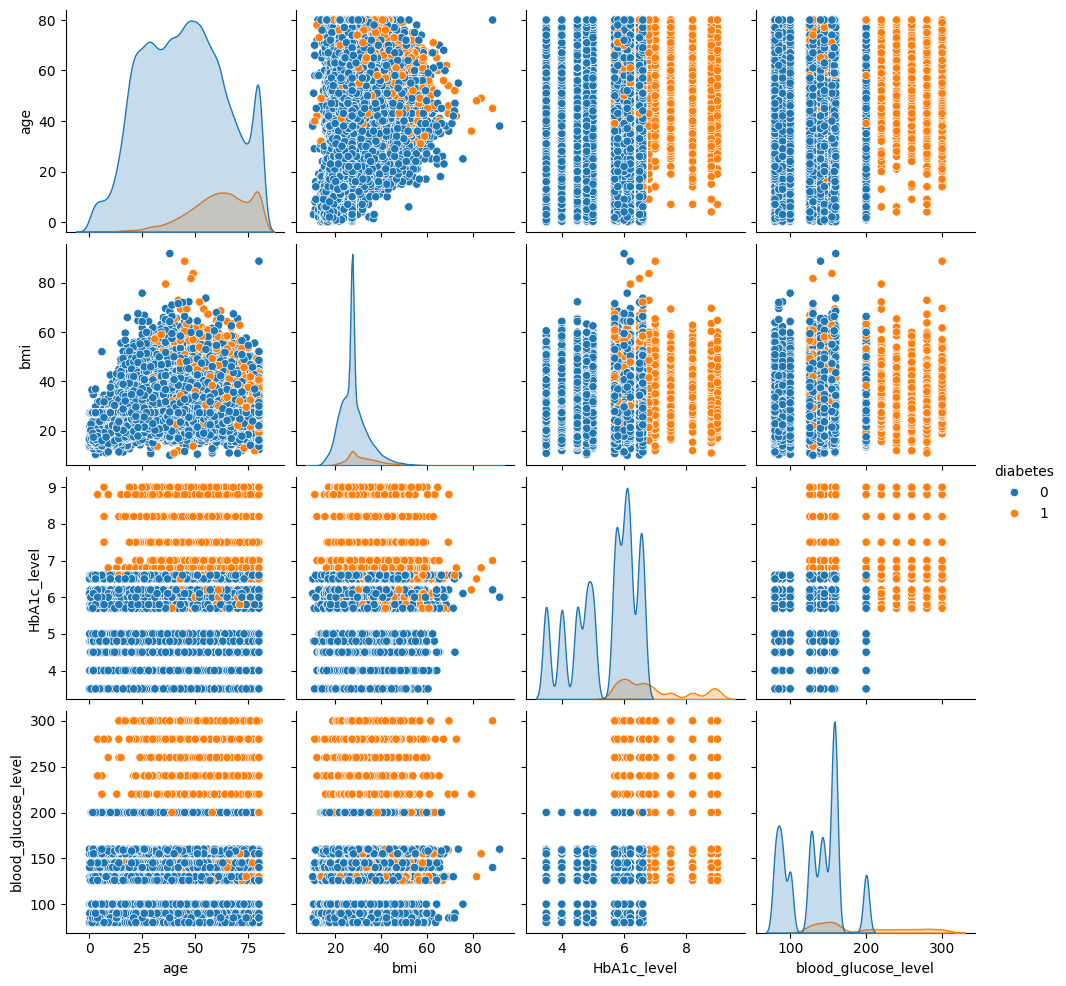

In [ ]:
# Pairplot to verify linear andnon-linear trends
sns.pairplot(data, hue='diabetes', vars=num_cols)

In [ ]:
# Define features (X) and target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Preview
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                3  25.19   
2       1  28.0             0              0                3  27.32   
3       0  36.0             0              0                0  23.45   
4       1  76.0             1              1                0  20.14   
5       0  20.0             0              0                3  27.32   

   HbA1c_level  blood_glucose_level  
0          6.6                  140  
2          5.7                  158  
3          5.0                  155  
4          4.8                  155  
5          6.6                   85  

Target (y):
0    0
2    0
3    0
4    0
5    0
Name: diabetes, dtype: int64


In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create sampling versions
samplers = {
    'Original': (X_train_base, y_train_base),
    'Oversampled': SMOTE().fit_resample(X_train_base, y_train_base),
    'Undersampled': RandomUnderSampler().fit_resample(X_train_base, y_train_base)
}


In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000)
}


In [ ]:
# Evaluate Models
results = []
for sampling, (X_train, y_train) in samplers.items():
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test_base)
        tn, fp, fn, tp = confusion_matrix(y_test_base, y_pred).ravel()
        results.append({
            'Model': name,
            'Dataset Type': sampling,
            'Accuracy': accuracy_score(y_test_base, y_pred),
            'Precision': precision_score(y_test_base, y_pred),
            'Recall (Sensitivity)': recall_score(y_test_base, y_pred),
            'Specificity': tn / (tn + fp),
            'F1 Score': f1_score(y_test_base, y_pred)
        })


In [ ]:
# Create DataFrame from results
results_df = pd.DataFrame(results)

# Set desired order for model and sampling type
model_order = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Neural Network']
sampling_order = ['Original', 'Oversampled', 'Undersampled']

# Convert to categorical to control sort order
results_df['Model'] = pd.Categorical(results_df['Model'], categories=model_order, ordered=True)
results_df['Dataset Type'] = pd.Categorical(results_df['Dataset Type'], categories=sampling_order, ordered=True)

# Sort by Model and then Sampling
results_df = results_df.sort_values(by=['Model', 'Dataset Type']).reset_index(drop=True)

# Rename 'Sampling' to 'Dataset Type' if needed
results_df.rename(columns={'Dataset Type': 'Dataset Type', 'Recall (Sensitivity)': 'Recall'}, inplace=True)

styled_df = results_df.style.format(precision=2)
display(styled_df)

,Model,Dataset Type,Accuracy,Precision,Recall,Specificity,F1 Score
0,Logistic Regression,Original,0.95,0.85,0.64,0.99,0.73
1,Logistic Regression,Oversampled,0.88,0.48,0.86,0.88,0.61
2,Logistic Regression,Undersampled,0.88,0.48,0.86,0.88,0.61
3,Decision Tree,Original,0.94,0.71,0.76,0.96,0.74
4,Decision Tree,Oversampled,0.94,0.70,0.75,0.96,0.73
5,Decision Tree,Undersampled,0.87,0.45,0.87,0.87,0.59
6,Random Forest,Original,0.96,0.94,0.70,0.99,0.80
7,Random Forest,Oversampled,0.95,0.78,0.75,0.97,0.77
8,Random Forest,Undersampled,0.89,0.51,0.89,0.90,0.65
9,KNN,Original,0.95,0.87,0.62,0.99,0.72


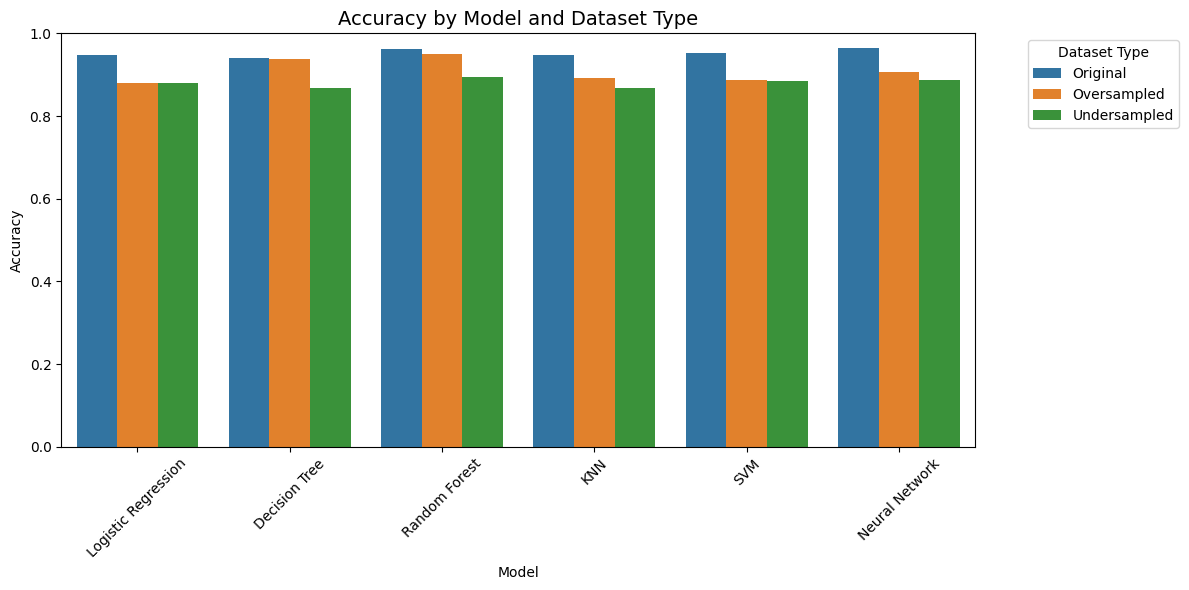

In [ ]:
# Reshape the DataFrame for flexible plotting
metrics_long = results_df.melt(
    id_vars=['Model', 'Dataset Type'],
    value_vars=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    var_name='Metric',
    value_name='Score'
)

# Plot Accuracy by Model and Dataset Type
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Dataset Type')
plt.title("Accuracy by Model and Dataset Type", fontsize=14)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="Dataset Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Assuming you already trained your best model (MLPClassifier) on original data
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Train the Neural Network on original data
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train_base, y_train_base)

# Predict on the test set
y_pred = nn_model.predict(X_test_base)

# Count predictions
unique, counts = np.unique(y_pred, return_counts=True)
prediction_counts = dict(zip(unique, counts))

print("Prediction counts:")
print(f"Not Diabetic (0): {prediction_counts.get(0, 0)}")
print(f"Diabetic (1): {prediction_counts.get(1, 0)}")

# Optional: View classification report
print("\nClassification Report:")
print(classification_report(y_test_base, y_pred))


Prediction counts:
Not Diabetic (0): 17650
Diabetic (1): 1606

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17133
           1       0.93      0.71      0.80      2123

    accuracy                           0.96     19256
   macro avg       0.95      0.85      0.89     19256
weighted avg       0.96      0.96      0.96     19256



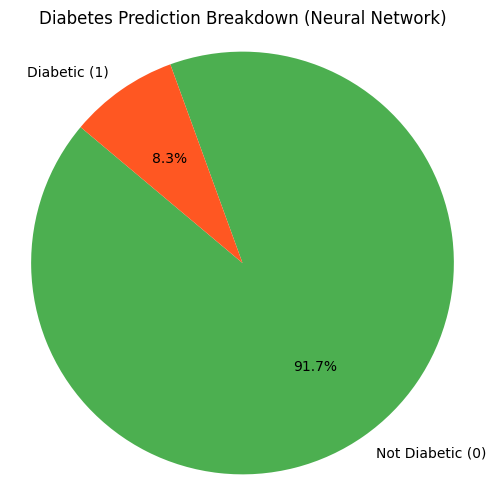

In [ ]:
#Diabetes Prediction Breakdown
import matplotlib.pyplot as plt

labels = ['Not Diabetic (0)', 'Diabetic (1)']
sizes = [17650, 1606]
colors = ['#4CAF50', '#FF5722']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Prediction Breakdown (Neural Network)')
plt.axis('equal')
plt.show()
